In [1]:
from SubTempNet import *
from edgelist import *
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Emp

In [48]:
names=["primaryschool","hospital","highschool2012","lotr","hypertext","SFHH"]
mins=[]
means =[]
Is=[]
for name in names:
    filename = "data/"+name+".edges"
    objname= name
    STN = SubTempNet(filename, objname, directed= False, init = False)
    print(STN)
    num = 50
    T = sorted(list(set(np.logspace(np.log10(STN["T"]),np.log10(1), num, dtype = int))))
    I = [2** i for i in range(1,int(np.log2(STN["T"])+1))]
    i,m = STN.get_min(I,T)
    Is.append(i)
    mins.append(m)
    i,m = STN.get_mean(I,T)
    means.append(m)
names=["primaryschool","hospital","highschool","lotr","hypertext","SFHH"]

filename =	data/primaryschool.edges
objname =	primaryschool_SubTempNet
directed =	False
ncount = 	242
ecount = 	125773
T = 		5846

filename =	data/hospital.edges
objname =	hospital_SubTempNet
directed =	False
ncount = 	75
ecount = 	32424
T = 		17376

filename =	data/highschool2012.edges
objname =	highschool2012_SubTempNet
directed =	False
ncount = 	92
ecount = 	9827
T = 		49382

filename =	data/lotr.edges
objname =	lotr_SubTempNet
directed =	False
ncount = 	139
ecount = 	2649
T = 		32642

filename =	data/hypertext.edges
objname =	hypertext_SubTempNet
directed =	False
ncount = 	113
ecount = 	20818
T = 		10618

filename =	data/SFHH.edges
objname =	SFHH_SubTempNet
directed =	False
ncount = 	403
ecount = 	70261
T = 		5716



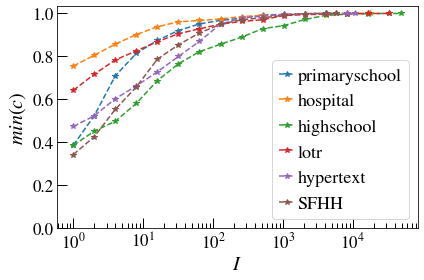

In [49]:
fig, ax = plt.subplots()
ax.set_ylabel(r'$ min(c)$')
ax.set_xlabel(r'$I$')
ax.set_xscale("log")
ax.set_yscale("linear")
for j in range(len(names)):
    name = names[j]
    m=mins[j]
    i=Is[j]
    ax.plot(i,m,"--*", label = name)
ax.tick_params(which = 'major', axis='both', width=1, length = 10, labelsize=17, direction='in')
ax.tick_params(which = 'minor', axis='both', width=1, length = 5, labelsize=17, direction='in')
ax.set_ylim(0, ax.set_ylim()[1])
ax.legend(loc="lower right", handlelength = 0.8, handletextpad=0.2)
fig.tight_layout()
fig.savefig("fig/emp_min.png", dpi=600)

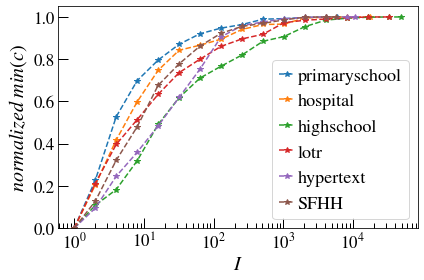

In [50]:
names=["primaryschool","hospital","highschool","lotr","hypertext","SFHH"]
fig, ax = plt.subplots()
ax.set_ylabel(r'$normalized\ min(c)$')
ax.set_xlabel(r'$I$')
ax.set_xscale("log")
ax.set_yscale("linear")
for j in range(len(names)):
    name = names[j]
    m=mins[j]
    I=Is[j]
    if True:#normalize
        m = [(i-min(m))/(1-min(m)) for i in m]
    ax.plot(I,m,"--*", label = name)
ax.tick_params(which = 'major', axis='both', width=1, length = 10, labelsize=17, direction='in')
ax.tick_params(which = 'minor', axis='both', width=1, length = 5, labelsize=17, direction='in')
ax.set_ylim(0, ax.set_ylim()[1])
ax.legend(loc="lower right", handlelength = 0.8, handletextpad=0.2)
fig.tight_layout()
fig.savefig("fig/emp_min_norm.png", dpi=600)

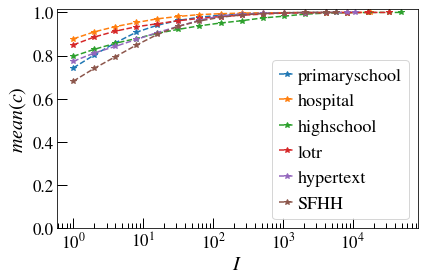

In [51]:
fig, ax = plt.subplots()
ax.set_ylabel(r'$mean(c)$')
ax.set_xlabel(r'$I$')
ax.set_xscale("log")
ax.set_yscale("linear")
for j in range(len(names)):
    name = names[j]
    m=means[j]
    i=Is[j]
    ax.plot(i,m,"--*", label = name)
ax.tick_params(which = 'major', axis='both', width=1, length = 10, labelsize=17, direction='in')
ax.tick_params(which = 'minor', axis='both', width=1, length = 5, labelsize=17, direction='in')
ax.set_ylim(0, ax.set_ylim()[1])
ax.legend(loc="lower right", handlelength = 0.8, handletextpad=0.2)
fig.tight_layout()
fig.savefig("fig/emp_mean.png", dpi=600)

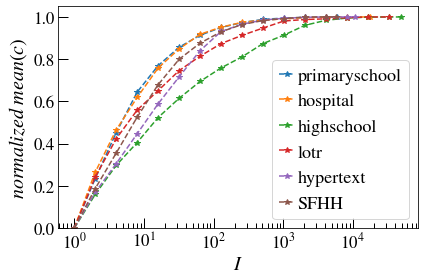

In [52]:
fig, ax = plt.subplots()
ax.set_ylabel(r'$normalized\ mean(c)$')
ax.set_xlabel(r'$I$')
ax.set_xscale("log")
ax.set_yscale("linear")
for j in range(len(names)):
    name = names[j]
    m=means[j]
    i=Is[j]
    if True:#normalize
        m = [(i-min(m))/(1-min(m)) for i in m]
    ax.plot(i,m,"--*", label = name)
ax.tick_params(which = 'major', axis='both', width=1, length = 10, labelsize=17, direction='in')
ax.tick_params(which = 'minor', axis='both', width=1, length = 5, labelsize=17, direction='in')
ax.set_ylim(0, ax.set_ylim()[1])
ax.legend(loc="lower right", handlelength = 0.8, handletextpad=0.2)
fig.tight_layout()
fig.savefig("fig/emp_mean_norm.png", dpi=600)

# Edge Time random

In [66]:
names=["primaryschool","hospital","highschool2012","lotr","hypertext","SFHH"]
mins=[]
means =[]
Is=[]
for name in names:
    name = name + "_ET"
    filename = "data/"+name+".edges"
    objname= name
    STN = SubTempNet(filename, objname, directed= False, init = False)
    print(STN)
    num = 50
    T = sorted(list(set(np.logspace(np.log10(STN["T"]),np.log10(1), num, dtype = int))))
    I = [2** i for i in range(1,int(np.log2(STN["T"])+1))]
    i,m = STN.get_min(I,T)
    Is.append(i)
    mins.append(m)
    i,m = STN.get_mean(I,T)
    means.append(m)
names=["primaryschool","hospital","highschool","lotr","hypertext","SFHH"]

filename =	data/primaryschool_ET.edges
objname =	primaryschool_ET_SubTempNet
directed =	False
ncount = 	242
ecount = 	125773
T = 		5846

filename =	data/hospital_ET.edges
objname =	hospital_ET_SubTempNet
directed =	False
ncount = 	75
ecount = 	32424
T = 		17375

filename =	data/highschool2012_ET.edges
objname =	highschool2012_ET_SubTempNet
directed =	False
ncount = 	92
ecount = 	9827
T = 		49378

filename =	data/lotr_ET.edges
objname =	lotr_ET_SubTempNet
directed =	False
ncount = 	139
ecount = 	2649
T = 		32612

filename =	data/hypertext_ET.edges
objname =	hypertext_ET_SubTempNet
directed =	False
ncount = 	113
ecount = 	20818
T = 		10618

filename =	data/SFHH_ET.edges
objname =	SFHH_ET_SubTempNet
directed =	False
ncount = 	403
ecount = 	70261
T = 		5716



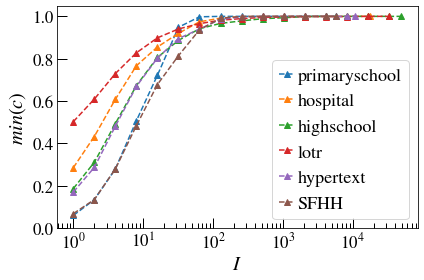

In [67]:
fig, ax = plt.subplots()
ax.set_ylabel(r'$ min(c)$')
ax.set_xlabel(r'$I$')
ax.set_xscale("log")
ax.set_yscale("linear")
for j in range(len(names)):
    name = names[j]
    m=mins[j]
    i=Is[j]
    ax.plot(i,m,"--^", label = name)
ax.tick_params(which = 'major', axis='both', width=1, length = 10, labelsize=17, direction='in')
ax.tick_params(which = 'minor', axis='both', width=1, length = 5, labelsize=17, direction='in')
ax.set_ylim(0, ax.set_ylim()[1])
ax.legend(loc="lower right", handlelength = 0.8, handletextpad=0.2)
fig.tight_layout()
fig.savefig("fig/emp_ET_min.png", dpi=600)

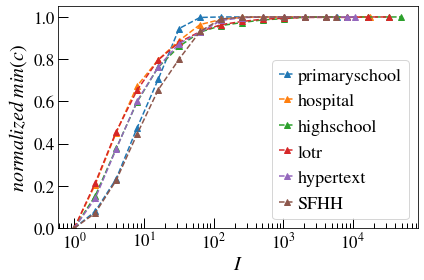

In [68]:
names=["primaryschool","hospital","highschool","lotr","hypertext","SFHH"]
fig, ax = plt.subplots()
ax.set_ylabel(r'$normalized\ min(c)$')
ax.set_xlabel(r'$I$')
ax.set_xscale("log")
ax.set_yscale("linear")
for j in range(len(names)):
    name = names[j]
    m=mins[j]
    I=Is[j]
    if True:#normalize
        m = [(i-min(m))/(1-min(m)) for i in m]
    ax.plot(I,m,"--^", label = name)
ax.tick_params(which = 'major', axis='both', width=1, length = 10, labelsize=17, direction='in')
ax.tick_params(which = 'minor', axis='both', width=1, length = 5, labelsize=17, direction='in')
ax.set_ylim(0, ax.set_ylim()[1])
ax.legend(loc="lower right", handlelength = 0.8, handletextpad=0.2)
fig.tight_layout()
fig.savefig("fig/emp_ET_min_norm.png", dpi=600)

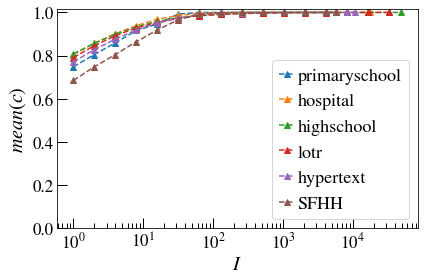

In [69]:
fig, ax = plt.subplots()
ax.set_ylabel(r'$mean(c)$')
ax.set_xlabel(r'$I$')
ax.set_xscale("log")
ax.set_yscale("linear")
for j in range(len(names)):
    name = names[j]
    m=means[j]
    i=Is[j]
    ax.plot(i,m,"--^", label = name)
ax.tick_params(which = 'major', axis='both', width=1, length = 10, labelsize=17, direction='in')
ax.tick_params(which = 'minor', axis='both', width=1, length = 5, labelsize=17, direction='in')
ax.set_ylim(0, ax.set_ylim()[1])
ax.legend(loc="lower right", handlelength = 0.8, handletextpad=0.2)
fig.tight_layout()
fig.savefig("fig/emp_ET_mean.png", dpi=600)

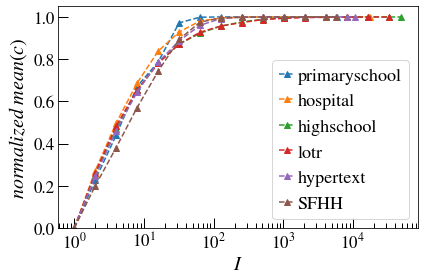

In [70]:
fig, ax = plt.subplots()
ax.set_ylabel(r'$normalized\ mean(c)$')
ax.set_xlabel(r'$I$')
ax.set_xscale("log")
ax.set_yscale("linear")
for j in range(len(names)):
    name = names[j]
    m=means[j]
    i=Is[j]
    if True:#normalize
        m = [(i-min(m))/(1-min(m)) for i in m]
    ax.plot(i,m,"--^", label = name)
ax.tick_params(which = 'major', axis='both', width=1, length = 10, labelsize=17, direction='in')
ax.tick_params(which = 'minor', axis='both', width=1, length = 5, labelsize=17, direction='in')
ax.set_ylim(0, ax.set_ylim()[1])
ax.legend(loc="lower right", handlelength = 0.8, handletextpad=0.2)
fig.tight_layout()
fig.savefig("fig/emp_ET_mean_norm.png", dpi=600)

# Snapshot time random

In [71]:
names=["primaryschool","hospital","highschool2012","lotr","hypertext","SFHH"]
mins=[]
means =[]
Is=[]
for name in names:
    name = name + "_ST"
    filename = "data/"+name+".edges"
    objname= name
    STN = SubTempNet(filename, objname, directed= False, init = False)
    print(STN)
    num = 50
    T = sorted(list(set(np.logspace(np.log10(STN["T"]),np.log10(1), num, dtype = int))))
    I = [2** i for i in range(1,int(np.log2(STN["T"])+1))]
    i,m = STN.get_min(I,T)
    Is.append(i)
    mins.append(m)
    i,m = STN.get_mean(I,T)
    means.append(m)
names=["primaryschool","hospital","highschool","lotr","hypertext","SFHH"]

filename =	data/primaryschool_ST.edges
objname =	primaryschool_ST_SubTempNet
directed =	False
ncount = 	242
ecount = 	125773
T = 		5846

filename =	data/hospital_ST.edges
objname =	hospital_ST_SubTempNet
directed =	False
ncount = 	75
ecount = 	32424
T = 		17375

filename =	data/highschool2012_ST.edges
objname =	highschool2012_ST_SubTempNet
directed =	False
ncount = 	92
ecount = 	9827
T = 		49380

filename =	data/lotr_ST.edges
objname =	lotr_ST_SubTempNet
directed =	False
ncount = 	139
ecount = 	2649
T = 		32562

filename =	data/hypertext_ST.edges
objname =	hypertext_ST_SubTempNet
directed =	False
ncount = 	113
ecount = 	20818
T = 		10611

filename =	data/SFHH_ST.edges
objname =	SFHH_ST_SubTempNet
directed =	False
ncount = 	403
ecount = 	70261
T = 		5714



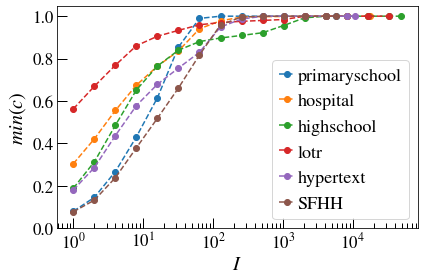

In [75]:
fig, ax = plt.subplots()
ax.set_ylabel(r'$ min(c)$')
ax.set_xlabel(r'$I$')
ax.set_xscale("log")
ax.set_yscale("linear")
for j in range(len(names)):
    name = names[j]
    m=mins[j]
    i=Is[j]
    ax.plot(i,m,"--o", label = name)
ax.tick_params(which = 'major', axis='both', width=1, length = 10, labelsize=17, direction='in')
ax.tick_params(which = 'minor', axis='both', width=1, length = 5, labelsize=17, direction='in')
ax.set_ylim(0, ax.set_ylim()[1])
ax.legend(loc="lower right", handlelength = 0.8, handletextpad=0.2)
fig.tight_layout()
fig.savefig("fig/emp_ST_min.png", dpi=600)

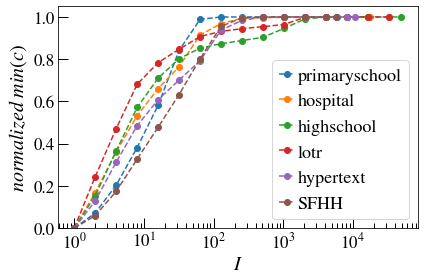

In [72]:
names=["primaryschool","hospital","highschool","lotr","hypertext","SFHH"]
fig, ax = plt.subplots()
ax.set_ylabel(r'$normalized\ min(c)$')
ax.set_xlabel(r'$I$')
ax.set_xscale("log")
ax.set_yscale("linear")
for j in range(len(names)):
    name = names[j]
    m=mins[j]
    I=Is[j]
    if True:#normalize
        m = [(i-min(m))/(1-min(m)) for i in m]
    ax.plot(I,m,"--o", label = name)
ax.tick_params(which = 'major', axis='both', width=1, length = 10, labelsize=17, direction='in')
ax.tick_params(which = 'minor', axis='both', width=1, length = 5, labelsize=17, direction='in')
ax.set_ylim(0, ax.set_ylim()[1])
ax.legend(loc="lower right", handlelength = 0.8, handletextpad=0.2)
fig.tight_layout()
fig.savefig("fig/emp_ST_min_norm.png", dpi=600)

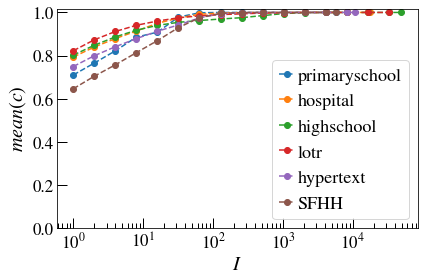

In [73]:
fig, ax = plt.subplots()
ax.set_ylabel(r'$mean(c)$')
ax.set_xlabel(r'$I$')
ax.set_xscale("log")
ax.set_yscale("linear")
for j in range(len(names)):
    name = names[j]
    m=means[j]
    i=Is[j]
    ax.plot(i,m,"--o", label = name)
ax.tick_params(which = 'major', axis='both', width=1, length = 10, labelsize=17, direction='in')
ax.tick_params(which = 'minor', axis='both', width=1, length = 5, labelsize=17, direction='in')
ax.set_ylim(0, ax.set_ylim()[1])
ax.legend(loc="lower right", handlelength = 0.8, handletextpad=0.2)
fig.tight_layout()
fig.savefig("fig/emp_ST_mean.png", dpi=600)

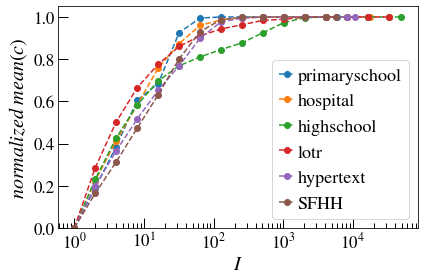

In [74]:
fig, ax = plt.subplots()
ax.set_ylabel(r'$normalized\ mean(c)$')
ax.set_xlabel(r'$I$')
ax.set_xscale("log")
ax.set_yscale("linear")
for j in range(len(names)):
    name = names[j]
    m=means[j]
    i=Is[j]
    if True:#normalize
        m = [(i-min(m))/(1-min(m)) for i in m]
    ax.plot(i,m,"--o", label = name)
ax.tick_params(which = 'major', axis='both', width=1, length = 10, labelsize=17, direction='in')
ax.tick_params(which = 'minor', axis='both', width=1, length = 5, labelsize=17, direction='in')
ax.set_ylim(0, ax.set_ylim()[1])
ax.legend(loc="lower right", handlelength = 0.8, handletextpad=0.2)
fig.tight_layout()
fig.savefig("fig/emp_ST_mean_norm.png", dpi=600)

# Random

In [28]:
names = ["random TN", "random TN with 2 blocks"]
mins=[]
means =[]
Is=[]
T=True
filepath ="data/ER/ER_ud_n100_p0001_T15000.edges"
objname = "ER_n100_p0001"
STN= SubTempNet(filepath,objname,directed= False, init = False)
I = [2** i for i in range(1,12)]
i,m = STN.get_min(I,T=False)
Is.append(i)
mins.append(m)
i,m = STN.get_mean(I,T=False)
means.append(m)



filepath ="data/SBM/SBM_ud_n50-50_p001-00005_T30000.edges"
objname = "SBM_n50-50_p001-00005"
STN= SubTempNet(filepath,objname,directed= False, init = False)
I = [2** i for i in range(1,12)]
i,m = STN.get_min(I,T = False)
Is.append(i)
mins.append(m)
i,m = STN.get_mean(I,T=False)
means.append(m)

In [40]:
mins = [([min(j,1) for j in i]) for i in mins]
print(mins)

[[0.10534693558677621, 0.21825121696674232, 0.42582162939945795, 0.6300572749655501, 0.7701088409851965, 0.893866394885574, 0.9423008658342722, 0.96537248298271, 0.9791908620147836, 0.9928659996359153, 0.9992068270213965, 1.0], [0.22390332326283988, 0.3777158604729061, 0.580987372358208, 0.761677207776997, 0.8773553336079076, 0.9319041614123582, 0.9788993211553808, 0.9996770462499812, 0.9998873180186, 1.0, 1, 1]]


In [39]:
mins[1][-2]=1

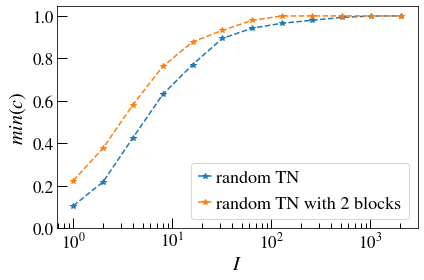

In [45]:
fig, ax = plt.subplots()
ax.set_ylabel(r'$ min(c)$')
ax.set_xlabel(r'$I$')
ax.set_xscale("log")
ax.set_yscale("linear")
for j in range(len(names)):
    name = names[j]
    m=mins[j]
    i=Is[j]
    ax.plot(i,m,"--*", label = name)
ax.tick_params(which = 'major', axis='both', width=1, length = 10, labelsize=17, direction='in')
ax.tick_params(which = 'minor', axis='both', width=1, length = 5, labelsize=17, direction='in')
ax.set_ylim(0, ax.set_ylim()[1])
ax.legend(loc="lower right", handlelength = 0.8, handletextpad=0.2)
fig.tight_layout()
fig.savefig("fig/rnd_min.png", dpi=600)

In [44]:
print(mins)

[[0.10534693558677621, 0.21825121696674232, 0.42582162939945795, 0.6300572749655501, 0.7701088409851965, 0.893866394885574, 0.9423008658342722, 0.96537248298271, 0.9791908620147836, 0.9928659996359153, 0.9992068270213965, 1.0], [0.22390332326283988, 0.3777158604729061, 0.580987372358208, 0.761677207776997, 0.8773553336079076, 0.9319041614123582, 0.9788993211553808, 0.9996770462499812, 0.9998873180186, 1.0, 1, 1]]


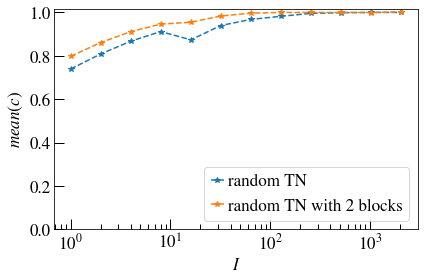

In [42]:
fig, ax = plt.subplots()
ax.set_ylabel(r'$mean(c)$')
ax.set_xlabel(r'$I$')
ax.set_xscale("log")
ax.set_yscale("linear")
for j in range(len(names)):
    name = names[j]
    m=means[j]
    i=Is[j]
    ax.plot(i,m,"--*", label = name)
ax.tick_params(which = 'major', axis='both', width=1, length = 10, labelsize=17, direction='in')
ax.tick_params(which = 'minor', axis='both', width=1, length = 5, labelsize=17, direction='in')
ax.set_ylim(0, ax.set_ylim()[1])
ax.legend(loc="lower right", handlelength = 0.8, handletextpad=0.2)
fig.tight_layout()
#fig.savefig("fig/rnd_mean.png", dpi=600)